In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
x = np.array(range(25))
y = x ** 1.3 + np.random.normal(10, 10, x.shape[0])
X = np.stack((x, y), axis = 1)

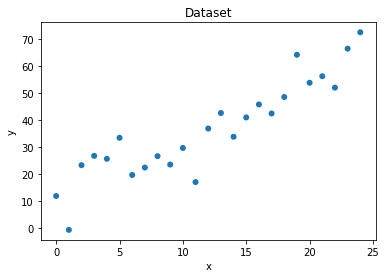

In [4]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], edgecolor = "none")
plt.title('Dataset')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [14]:
def feature_normaliza(X):
    mu = np.mean(X, 0)      
    sigma = np.std(X, 0)   
    def get_norm(col):
        mu = np.mean(col)      
        sigma = np.std(col)
        return (col - mu)/sigma
    return np.apply_along_axis(get_norm, 0, X), mu, sigma

def drawline(p1, p2, color = 'r'):
    sns.lineplot([p1[0],p2[0]], [p1[1],p2[1]], color = color) 
    
def project_data(X_norm, U, K):
    Z = np.zeros((X_norm.shape[0], K))
    U_reduce = U[:, 0:K]         
    Z = np.dot(X_norm, U_reduce) 
    return Z

def recover_data(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    U_recude = U[:, 0:K]
    X_rec = np.dot(Z, U_recude.T)
    return X_rec

In [6]:
X_norm, mu, sigma = feature_normaliza(X) 

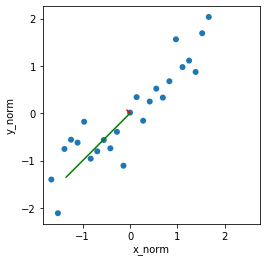

In [16]:
m = X.shape[0]
Sig = np.dot(X_norm.T,X_norm)/m  
U,S,V = np.linalg.svd(Sig)       

sns.scatterplot(x = X_norm[:, 0], y = X_norm[:, 1], edgecolor = "none")
drawline((0, 0), S[0]*U[:,0], color = 'g')
drawline((0, 0), S[1]*U[:,1])
plt.ylabel('y_norm')
plt.xlabel('x_norm')
plt.axis('square')
plt.show()

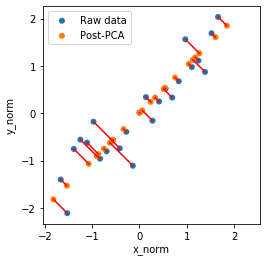

In [10]:
K = 1 
Z = project_data(X_norm, U, K)   
X_rec = recover_data(Z, U, K)   

sns.scatterplot(x = X_norm[:, 0], y = X_norm[:, 1], edgecolor = "none")
sns.scatterplot(x = X_rec[:, 0], y = X_rec[:, 1], edgecolor = "none")
plt.legend(['Raw data', 'Post-PCA'])

for i in range(X_norm.shape[0]):
    drawline(X_norm[i,:], X_rec[i,:])

plt.ylabel('y_norm')
plt.xlabel('x_norm')
plt.axis('square')
plt.show()